<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/house_regression_keras_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7410 sha256=5bc4cf4982f5013d921d3a08a3ccf778bbe8ddba20f643148aab1ab6750c70e2
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 153.6 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [0]:
!kill -9 -1

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_toolkits
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv.txt to kc_house_data.csv.txt


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv.txt']))

In [17]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,20150225,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [0]:
df['date'] = df['date'].map(lambda x: x[:8])

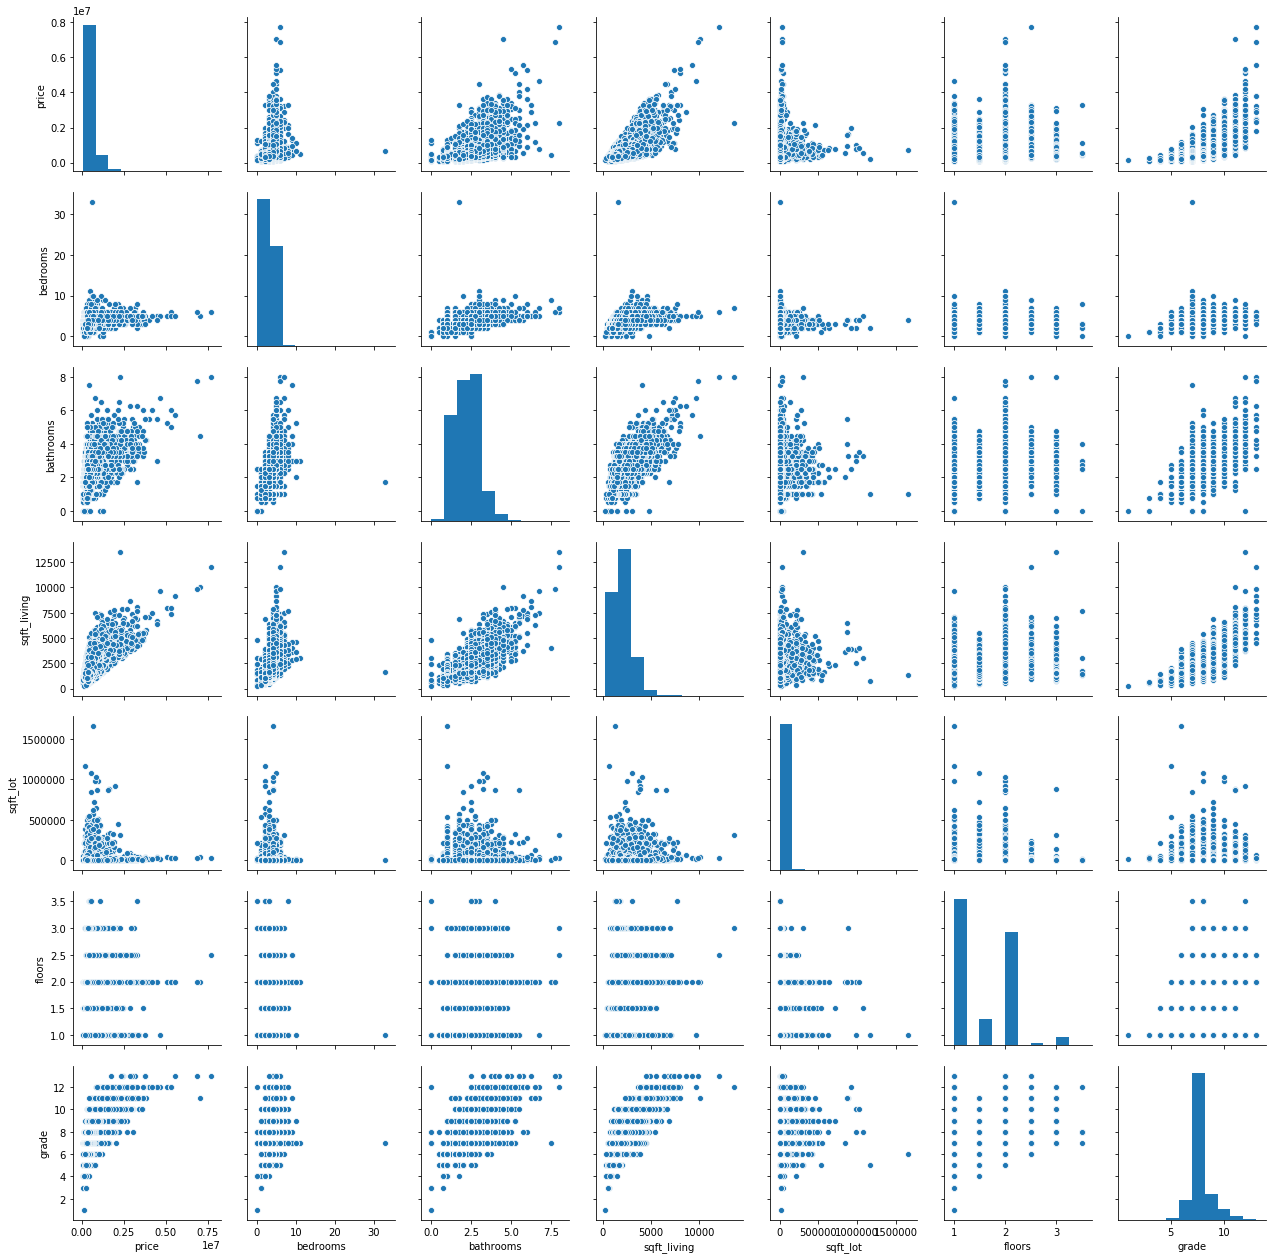

In [38]:
sns.pairplot(df, vars=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade'])

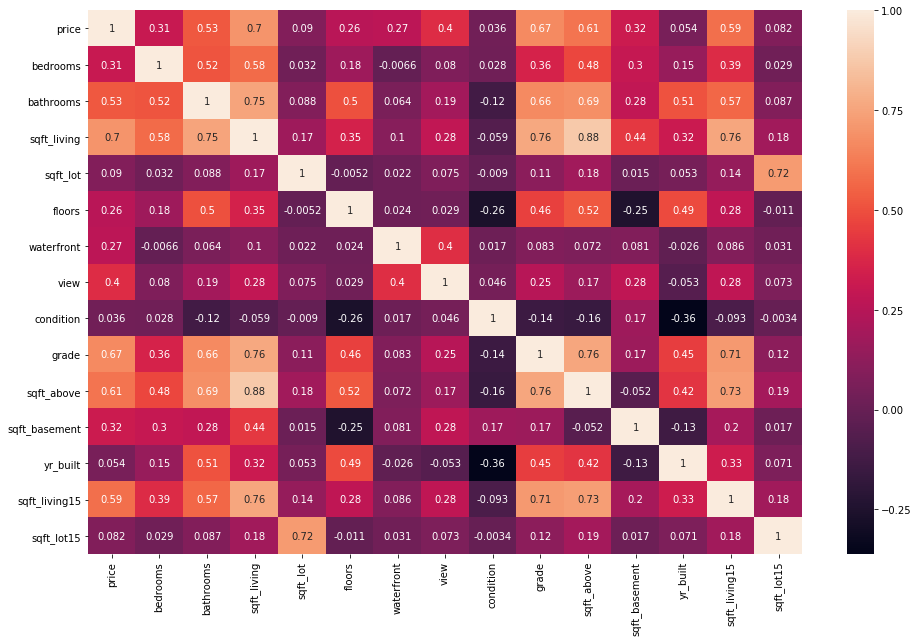

In [28]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot = True)

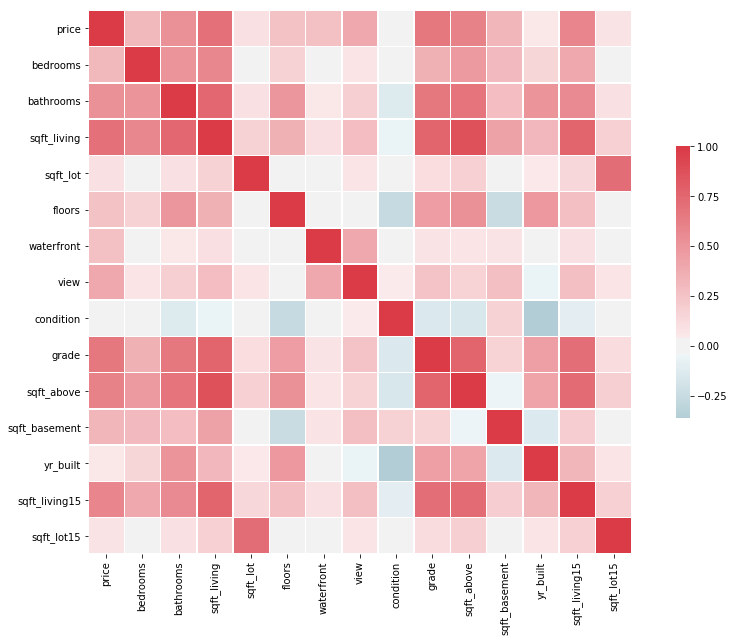

In [35]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(16, 10))
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso', Lasso(tol=0.1)),
    ('Ridge', Ridge()),
    ('SVR', LinearSVR()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('XGboost', GradientBoostingRegressor())
         ]  

In [0]:
from sklearn import metrics

In [57]:
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(name, '\n', 'MAE:', metrics.mean_absolute_error(y_test, predictions),'\n',
                'MSE:', metrics.mean_squared_error(y_test, predictions),'\n',
                'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), '\n',
          'model score:', clf.score(X_test,y_test), '\n')

Linear Regression 
 MAE: 143495.45185274162 
 MSE: 51319815670.38123 
 RMSE: 226538.77299566453 
 model score: 0.6477200905820715 

Lasso 
 MAE: 143495.81629166874 
 MSE: 51320141726.13232 
 RMSE: 226539.49264120002 
 model score: 0.6477178524039144 

Ridge 
 MAE: 143506.4500707023 
 MSE: 51328908494.70723 
 RMSE: 226558.84113118876 
 model score: 0.647657673769227 



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVR 
 MAE: 234298.20108062992 
 MSE: 135078875448.09746 
 RMSE: 367530.78163345373 
 model score: 0.07276412852365333 

Decision Tree 
 MAE: 163983.63043478262 
 MSE: 75790736526.71092 
 RMSE: 275301.174219637 
 model score: 0.4797418219536355 

XGboost 
 MAE: 126045.53958186334 
 MSE: 38315459787.90006 
 RMSE: 195743.35183576494 
 model score: 0.7369872333509212 



In [0]:
################## Now with scaled values ########################

In [0]:
X = df.drop(['price'], axis = 1).values
y = df['price'].values

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
X = sc.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [70]:
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(name, '\n', 'MAE:', metrics.mean_absolute_error(y_test, predictions),'\n',
                'MSE:', metrics.mean_squared_error(y_test, predictions),'\n',
                'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), '\n',
          'model score:', clf.score(X_test,y_test), '\n')

Linear Regression 
 MAE: 143495.4518527524 
 MSE: 51319815670.38597 
 RMSE: 226538.772995675 
 model score: 0.647720090582039 

Lasso 
 MAE: 143495.82696457693 
 MSE: 51320134996.873886 
 RMSE: 226539.47778891405 
 model score: 0.647717898596258 

Ridge 
 MAE: 143494.28600107852 
 MSE: 51320015975.477066 
 RMSE: 226539.21509415773 
 model score: 0.6477187156071209 

SVR 
 MAE: 530298.9751021023 
 MSE: 426941784138.94995 
 RMSE: 653407.8237509481 
 model score: -1.9307005701113968 

Decision Tree 
 MAE: 163069.08001850138 
 MSE: 75271308763.02174 
 RMSE: 274356.1713594607 
 model score: 0.4833073835822442 

XGboost 
 MAE: 126175.87237630298 
 MSE: 38181585953.77936 
 RMSE: 195401.08995033614 
 model score: 0.7379061973327948 



In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0, 1), copy=True)

In [0]:
X = df.drop(['price'], axis = 1).values
y = df['price'].values

In [0]:
X = mms.fit_transform(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [78]:
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(name, '\n', 'MAE:', metrics.mean_absolute_error(y_test, predictions),'\n',
                'MSE:', metrics.mean_squared_error(y_test, predictions),'\n',
                'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), '\n',
          'model score:', clf.score(X_test,y_test), '\n')

Linear Regression 
 MAE: 143541.92340519998 
 MSE: 51304062502.89153 
 RMSE: 226504.00107479678 
 model score: 0.6478282266761675 

Lasso 
 MAE: 143497.30918255937 
 MSE: 51322127457.01446 
 RMSE: 226543.87534650866 
 model score: 0.6477042215463957 

Ridge 
 MAE: 143280.27212026465 
 MSE: 51328118898.624725 
 RMSE: 226557.09853947355 
 model score: 0.647663093875141 

SVR 
 MAE: 502753.6082203387 
 MSE: 396813127908.6432 
 RMSE: 629931.0501226648 
 model score: -1.7238853244007233 

Decision Tree 
 MAE: 165288.8829787234 
 MSE: 72309802978.7322 
 RMSE: 268904.8214122093 
 model score: 0.5036363535093967 

XGboost 
 MAE: 126045.26308836085 
 MSE: 37957682849.91509 
 RMSE: 194827.31546144933 
 model score: 0.7394431585263874 



In [0]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [146]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [148]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 118637.07424692527
MSE: 35412155838.68322
RMSE: 188181.17822641885


In [149]:
clf.score(X_test,y_test)

0.7569166824123119

In [0]:
####### Neural nets ####################

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow import keras
from sklearn.pipeline import Pipeline

In [151]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 7         
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


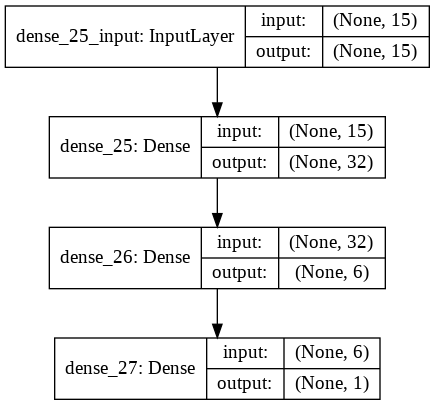

In [152]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [0]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.25)

In [96]:
model.evaluate(X_test, y_test)

2162/2162 [==============================] - 0s 48us/step


62067371027.89269

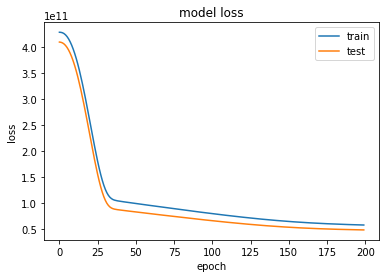

In [98]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
history = model.fit(X_train, y_train, epochs=1000, verbose=1, validation_split=0.10)

In [103]:
model.evaluate(X_test,y_test)

2162/2162 [==============================] - 0s 42us/step


51699607186.35338

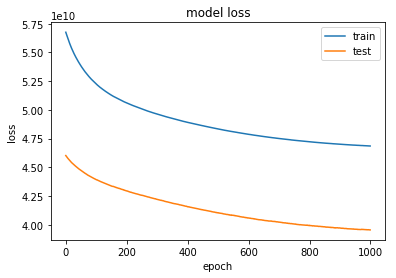

In [104]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [105]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                512       
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
Total params: 717
Trainable params: 717
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.10)

In [107]:
model.evaluate(X_test,y_test)

2162/2162 [==============================] - 0s 46us/step


57365845976.214615

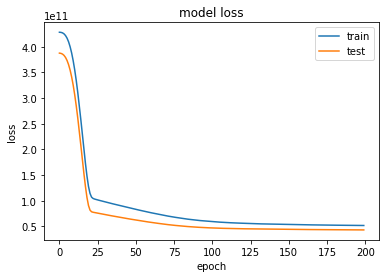

In [108]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [111]:
##### It looks like GradientBoostingRegressor is the best performencer with below hyperparameters#######################
clf

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
scaled_data = sc.fit_transform(df)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

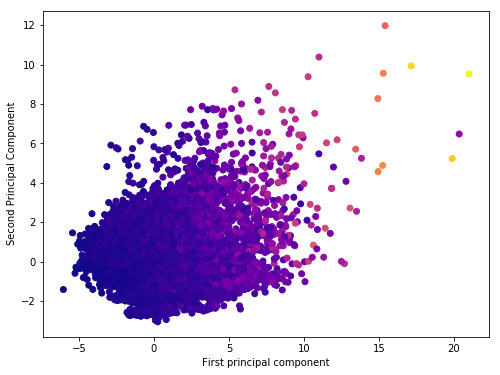

In [129]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['price'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.10, random_state=42)

In [132]:
for name, model in models:
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(name, '\n', 'MAE:', metrics.mean_absolute_error(y_test, predictions),'\n',
                'MSE:', metrics.mean_squared_error(y_test, predictions),'\n',
                'RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)), '\n',
          'model score:', clf.score(X_test,y_test), '\n')

Linear Regression 
 MAE: 151179.10370912915 
 MSE: 50719468419.32934 
 RMSE: 225209.83197749013 
 model score: 0.6518411162026277 

Lasso 
 MAE: 151178.994660002 
 MSE: 50719473352.464584 
 RMSE: 225209.84292979867 
 model score: 0.6518410823395981 

Ridge 
 MAE: 151178.53354052448 
 MSE: 50719490757.453606 
 RMSE: 225209.8815715101 
 model score: 0.651840962864735 

SVR 
 MAE: 530290.1370318441 
 MSE: 426982692178.2553 
 RMSE: 653439.1266049618 
 model score: -1.9309813793893083 

Decision Tree 
 MAE: 178633.96160962072 
 MSE: 69404632762.94496 
 RMSE: 263447.5901634801 
 model score: 0.5235786133770964 

XGboost 
 MAE: 136358.04428725547 
 MSE: 41790739993.959854 
 RMSE: 204427.83566324782 
 model score: 0.7131315086137952 



In [133]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 7         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_pca = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.10)

In [135]:
model.evaluate(X_test,y_test)

2162/2162 [==============================] - 0s 43us/step


45054255138.10176

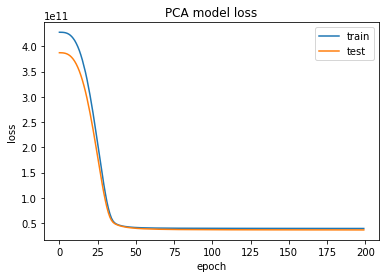

In [136]:
# summarize history for loss
plt.plot(history_pca.history['loss'])
plt.plot(history_pca.history['val_loss'])
plt.title('PCA model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [137]:
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [139]:
predictions = clf.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Model score:', clf.score(X_test,y_test))

MAE: 135206.6792432323
MSE: 41895406674.911354
RMSE: 204683.67466632836
Model score: 0.7124130343090258


In [0]:
def linear_regression(X, y, m = 0, b = 0, epochs = 1000, learning_rate = 0.0001):
  n = float(len(y))
  for i in range(epochs):
    y_current = (m*X) + b
    cost = sum([data**2 for data in (y - y_current)])/n
    m_gradient = - (2/n) * sum(X*(y - y_current))
    b_gradient = - (2/n) * sum(y - y_current)
    m = m - (learning_rate * m_gardient)
    b = b - (learning_rate * b_gradient)
  return(m, b, cost)    